<a href="https://colab.research.google.com/github/jesusdme/modelos_colab/blob/main/Modelo_Maiz_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar los datos
data = pd.read_csv('Maiz_Dataset_Colombia_Final.csv',sep=';')


# Selección de características y variable objetivo
X = data.drop(columns=['maize_sold'])
y = data['maize_sold']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

# Inicializar y entrenar el modelo/content/Frijol_Dataset_Colombia_Final.csv
rf_model = RandomForestRegressor(random_state=34,n_estimators=200)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 144.6113985148515
R-squared (R²): 0.8973699517564842


In [ ]:
import pandas as pd

def predecir_rendimiento(Year, maize_hectare, maize_improved_hectare, maize_improved_cost,
                         maize_hectare_fertilizer, maize_fertilizer_cost, maize_chemical_hectare,
                         maize_chemical_cost, maize_machinery_hectare, maize_machinery_cost,
                         maize_harvested, maize_sold_price, maize_harvest_loss, filter, filter_quartile, modelo):

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'maize_hectare': [maize_hectare],
        'maize_improved_hectare': [maize_improved_hectare],
        'maize_improved_cost': [maize_improved_cost],
        'maize_hectare_fertilizer': [maize_hectare_fertilizer],
        'maize_fertilizer_cost': [maize_fertilizer_cost],
        'maize_chemical_hectare': [maize_chemical_hectare],
        'maize_chemical_cost': [maize_chemical_cost],
        'maize_machinery_hectare': [maize_machinery_hectare],
        'maize_machinery_cost': [maize_machinery_cost],
        'maize_harvested': [maize_harvested],
        'maize_sold_price': [maize_sold_price],
        'maize_harvest_loss': [maize_harvest_loss],
        'filter': [filter],
        'filter_quartile': [filter_quartile]
    })

    # Realizar la predicción
    prediccion = modelo.predict(entrada)

    return prediccion[0]

# Ejemplo de uso
Year = 2018
maize_hectare = 0.1
maize_improved_hectare = 0.03
maize_improved_cost = 0.04
maize_hectare_fertilizer = 0.03
maize_fertilizer_cost = 0.02
maize_chemical_hectare = 0.01
maize_chemical_cost = 0.02
maize_machinery_hectare = 0.001
maize_machinery_cost = 0.005
maize_harvested = 0.002
maize_sold_price = 0.1
maize_harvest_loss = 0.01
filter=1200
filter_quartile = 3

resultado = predecir_rendimiento(Year, maize_hectare, maize_improved_hectare, maize_improved_cost,
                                 maize_hectare_fertilizer, maize_fertilizer_cost, maize_chemical_hectare,
                                 maize_chemical_cost, maize_machinery_hectare, maize_machinery_cost,
                                 maize_harvested, maize_sold_price, maize_harvest_loss, filter, filter_quartile, rf_model)

print(f'Predicción de rendimiento: {resultado:.3f} kg/ha')






Predicción de rendimiento: 182.820 kg/ha


# Ánalsis de Resultados

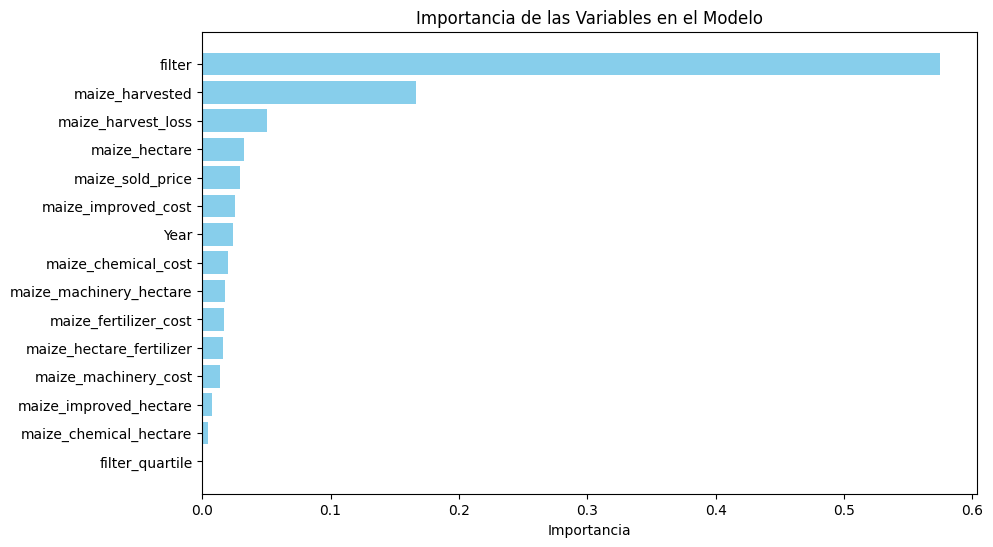

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns  # Nombres de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.gca().invert_yaxis()
plt.show()

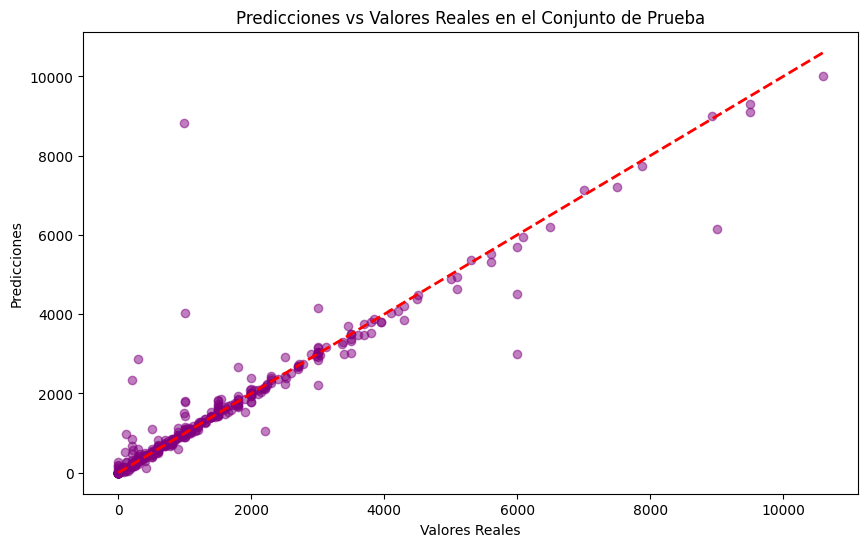

In [ ]:
# Generar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales en el Conjunto de Prueba')
plt.show()


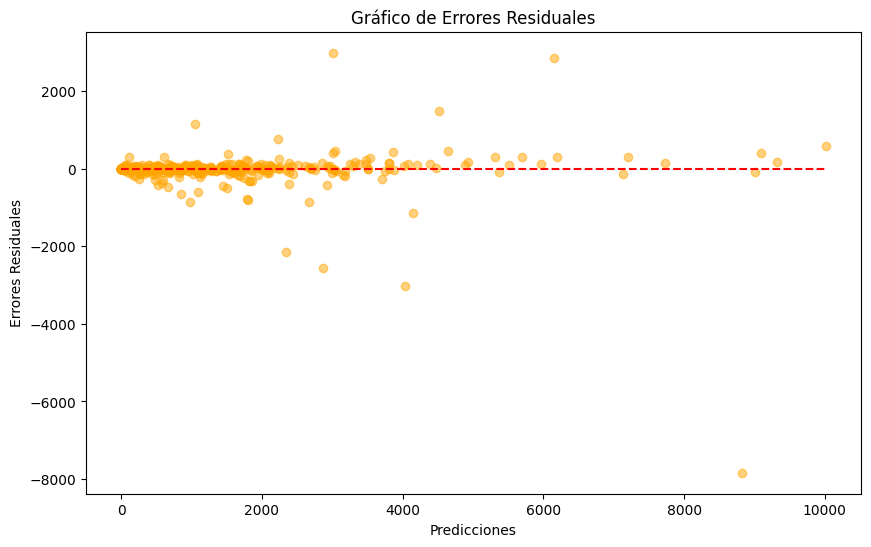

In [ ]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()


In [ ]:
pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 w

In [ ]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# Especifica la forma de entrada esperada para el modelo
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]

# Convierte el modelo a formato ONNX
onnx_model = convert_sklearn(rf_model, initial_types=initial_type)

# Guarda el modelo en formato ONNX
with open("rf_model_maiz.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Modelo guardado en formato ONNX como 'rf_model_maiz.onnx'")


Modelo guardado en formato ONNX como 'rf_model_maiz.onnx'


In [ ]:
pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

def predecir_rendimiento(Year, maize_hectare, maize_improved_hectare, maize_improved_cost,
                         maize_hectare_fertilizer, maize_fertilizer_cost, maize_chemical_hectare,
                         maize_chemical_cost, maize_machinery_hectare, maize_machinery_cost,
                         maize_harvested, maize_sold_price, maize_harvest_loss, filter, filter_quartile, modelo):

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'maize_hectare': [maize_hectare],
        'maize_improved_hectare': [maize_improved_hectare],
        'maize_improved_cost': [maize_improved_cost],
        'maize_hectare_fertilizer': [maize_hectare_fertilizer],
        'maize_fertilizer_cost': [maize_fertilizer_cost],
        'maize_chemical_hectare': [maize_chemical_hectare],
        'maize_chemical_cost': [maize_chemical_cost],
        'maize_machinery_hectare': [maize_machinery_hectare],
        'maize_machinery_cost': [maize_machinery_cost],
        'maize_harvested': [maize_harvested],
        'maize_sold_price': [maize_sold_price],
        'maize_harvest_loss': [maize_harvest_loss],
        'filter': [filter],
        'filter_quartile': [filter_quartile]
    })

    # Realizar la predicción
    prediccion = modelo.predict(entrada)

    # Devolver el primer valor de la predicción como un escalar
    return prediccion[0].item()

# Ejemplo de uso
Year = 2018
maize_hectare = 0.1
maize_improved_hectare = 0.03
maize_improved_cost = 0.04
maize_hectare_fertilizer = 0.03
maize_fertilizer_cost = 0.02
maize_chemical_hectare = 0.01
maize_chemical_cost = 0.02
maize_machinery_hectare = 0.001
maize_machinery_cost = 0.005
maize_harvested = 0.002
maize_sold_price = 0.1
maize_harvest_loss = 0.01
filter = 1200
filter_quartile = 3


hectare, harvested, _sold_price, _harvest_loss



resultado = predecir_rendimiento(Year, maize_hectare, maize_improved_hectare, maize_improved_cost,
                                 maize_hectare_fertilizer, maize_fertilizer_cost, maize_chemical_hectare,
                                 maize_chemical_cost, maize_machinery_hectare, maize_machinery_cost,
                                 maize_harvested, maize_sold_price, maize_harvest_loss, filter, filter_quartile, rf_model)

print(f'Predicción de rendimiento: {resultado:.3f} kg/ha')


Predicción de rendimiento: 182.820 kg/ha
